In [1]:
%%bash
pip install yfinance

In [2]:
# Import yfinance yahoo finance API module
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Test the yahoo finance function .Ticker 
XLK = yf.Ticker("XLK") # pass the name of the ETF or stock as an argument of .Ticker functio
print(XLK) # This returns an object

yfinance.Ticker object <XLK>


In [4]:
# .info method displays a borad summary of the ETF you searched for 
XLK.info

{'previousClose': 136.92,
 'regularMarketOpen': 135.5,
 'twoHundredDayAverage': 122.467155,
 'trailingAnnualDividendYield': 0.0059888987,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 136.48,
 'navPrice': 136.85,
 'averageDailyVolume10Day': 4943766,
 'totalAssets': 37484879872,
 'regularMarketPreviousClose': 136.92,
 'fiftyDayAverage': 132.42876,
 'trailingAnnualDividendRate': 0.8200000000000001,
 'open': 135.5,
 'toCurrency': None,
 'averageVolume10days': 4943766,
 'expireDate': None,
 'yield': 0.009300000000000001,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 134.53,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 5210533,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 6479446,
 'priceToSalesTrailing12Months': None,
 'dayLow': 134.53,
 

In [5]:
# .history function returns the ETF perfomance on a daily basis according to the period you specify 
XLK.history(period="max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-12-22,25.105283,25.177912,24.621093,24.826874,300500,0.0,0
1998-12-23,25.371591,25.420010,24.911609,25.420010,338300,0.0,0
1998-12-24,25.420006,25.420006,25.226330,25.323168,243700,0.0,0
1998-12-28,25.710525,25.710525,25.250544,25.395802,309300,0.0,0
1998-12-29,25.516845,25.577369,25.177911,25.468426,123800,0.0,0
...,...,...,...,...,...,...,...
2021-02-11,137.300003,137.970001,136.770004,137.880005,3781900,0.0,0
2021-02-12,137.520004,138.679993,137.139999,138.589996,3376200,0.0,0
2021-02-16,139.139999,139.240005,137.779999,138.139999,4858800,0.0,0


## Data Analysis Part I - COVID 19 Period

### Gather all the information related to Select Sector SPDR ETFs which are the Unique Exchange Traded Funds (ETFs) that divide the S&P into eleven index funds traded throughout the day on NYSE Arca

In [6]:
# Create a list with the ETFs names of the SPDR
ETF = 'XLE XLU XLK XLB XLP XLY XLI XLC XLV XLF XLRE'.split()
ETF

['XLE', 'XLU', 'XLK', 'XLB', 'XLP', 'XLY', 'XLI', 'XLC', 'XLV', 'XLF', 'XLRE']

In [7]:
# Use yahoo finance API function .download to return a dataframe with the information of the ETFs daily performance
etf_data= yf.download(tickers= ETF, start='2020-02-01', end='2021-02-01') # define the period (COVID)

[*********************100%***********************]  11 of 11 completed


In [8]:
# Display the pre_covid dataframe
etf_data.head()

Adj Close                                                         \
                  XLB        XLC        XLE        XLF        XLI        XLK   
Date                                                                           
2020-02-03  57.569996  54.086075  49.446842  29.406361  79.460899  95.390213   
2020-02-04  58.587547  54.651222  49.624981  29.689018  80.960342  97.888794   
2020-02-05  59.673592  54.740463  51.490719  30.283579  82.312790  98.461594   
2020-02-06  59.644238  55.424595  50.965687  30.244593  82.577400  99.360291   
2020-02-07  58.793015  55.384933  50.609417  30.137375  81.979576  98.451714   

                                                         ...   Volume  \
                  XLP       XLRE        XLU         XLV  ...      XLC   
Date                                                     ...            
2020-02-03  61.451023  37.957104  66.802864   98.338753  ...  5905700   
2020-02-04  61.820629  38.450054  66.136780  100.068810  ...  3504000   
2020-02-05  62.316669  38.421059  66.407074  101.995476  ...  3771700   
2020-02-06  62.423656  38.585373  66.426369  102.083946  ...  1998100   
2020-02-07  62.501465  38.604706  66.213997  101.287720  ...  2698600   

                                                                       \
                 XLE       XLF       XLI       XLK       XLP     XLRE   
Date                                                                    
2020-02-03  21290400  40168700  15676600  12542800  21797600  6254800   
2020-02-04  19819800  79273300  13597200   9548900  14290900  5309500   
2020-02-05  34382000  51086900  12835800  16348500  20911400  3049300   
2020-02-06  15400600  37044400   8627600   6752800   9628500  2676700   
2020-02-07  13693300  27982500  12394500   8299000  14849000  3216600   

                                         
                 XLU       XLV      XLY  
Date                                     
2020-02-03  13547900  11851800  8082200  
2020-02-04  20692100   9575100  8348600  
2020-02-05  16305100  14131000  6677000  
2020-02-06  14954100   6166500  5519900  
2020-02-07  10696400   6057200  3633800  

[5 rows x 66 columns]

In [9]:
# Select the etf_data close price column
close = etf_data['Close']
close

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-02-03,58.840000,54.549999,52.740002,30.170000,81.080002,96.589996,63.180000,39.270000,69.199997,100.040001,126.209999
2020-02-04,59.880001,55.119999,52.930000,30.459999,82.610001,99.120003,63.560001,39.779999,68.510002,101.800003,128.509995
2020-02-05,60.990002,55.209999,54.919998,31.070000,83.989998,99.699997,64.070000,39.750000,68.790001,103.760002,129.160004
2020-02-06,60.959999,55.900002,54.360001,31.030001,84.260002,100.610001,64.180000,39.919998,68.809998,103.849998,128.869995
2020-02-07,60.090000,55.860001,53.980000,30.920000,83.650002,99.690002,64.260002,39.939999,68.589996,103.040001,128.309998
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,73.989998,69.239998,41.639999,30.120001,87.910004,133.940002,65.720001,37.150002,64.099998,118.360001,170.729996
2021-01-26,72.970001,70.180000,40.750000,29.879999,87.099998,134.029999,66.309998,37.529999,63.459999,117.919998,170.619995
2021-01-27,70.820000,67.910004,40.200001,29.000000,85.370003,131.500000,65.190002,37.049999,61.750000,114.339996,165.360001


In [10]:
close.columns

Index(['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY'],
      dtype='object')

In [11]:
# check for values that equal 0
zero_df1 = close[close[['XLB', 'XLC', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLRE', 'XLU', 'XLV',
       'XLY']] == 0].sum()
zero_df1

XLB     0.0
XLC     0.0
XLE     0.0
XLF     0.0
XLI     0.0
XLK     0.0
XLP     0.0
XLRE    0.0
XLU     0.0
XLV     0.0
XLY     0.0
dtype: float64

In [12]:
# Check for null values
close.isna().sum()

XLB     0
XLC     0
XLE     0
XLF     0
XLI     0
XLK     0
XLP     0
XLRE    0
XLU     0
XLV     0
XLY     0
dtype: int64

In [13]:
# Create a copy of the dataframe to format the date column and pass them as labels to our plot
copy_c = close.copy() 
copy_c = copy_c.reset_index() 
copy_c.describe()

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,60.719283,57.443227,37.172311,25.257729,75.181634,107.905578,62.293147,35.503745,60.716733,103.679203,136.198645
std,8.690777,7.036258,6.303929,3.104512,10.007432,15.634132,3.997752,2.518856,4.109244,7.786274,20.140682
min,38.349998,40.220001,23.570000,17.660000,48.770000,70.400002,48.630001,25.459999,44.930000,74.620003,87.449997
25%,54.945000,53.545000,32.975000,23.225000,68.189999,96.439999,59.164999,34.595001,58.280001,99.985001,122.805000
50%,61.490002,57.880001,37.060001,24.680000,76.620003,110.430000,63.310001,35.770000,60.630001,104.209999,137.000000
75%,66.315002,63.059999,39.680000,27.835000,84.060001,120.910000,65.364998,36.645000,63.129999,108.264999,152.509995
max,77.480003,70.180000,55.040001,31.459999,90.470001,134.029999,68.150002,41.930000,70.980003,118.500000,170.729996


In [14]:
# create a new column called month_year with data format: Year-Month by using the 'Date' column 
copy_c['month_year'] = copy_c['Date'].apply(lambda x: x.strftime('%Y-%m'))
m_close = copy_c[['month_year']]
#months = m_close['month_year'].unique()
#months_labels = months.tolist() #take the unique year-month values an save it as a list

In [15]:
import numpy as np

In [16]:
x_axis_jb = np.arange(len(m_close))
tick_locations_jb= [value for value in x_axis_jb]

In [17]:
# Inspect the columns of the copy of the dataframe
for i, v in enumerate(copy_c.columns):
    print(i,v)

0 Date
1 XLB
2 XLC
3 XLE
4 XLF
5 XLI
6 XLK
7 XLP
8 XLRE
9 XLU
10 XLV
11 XLY
12 month_year


In [18]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

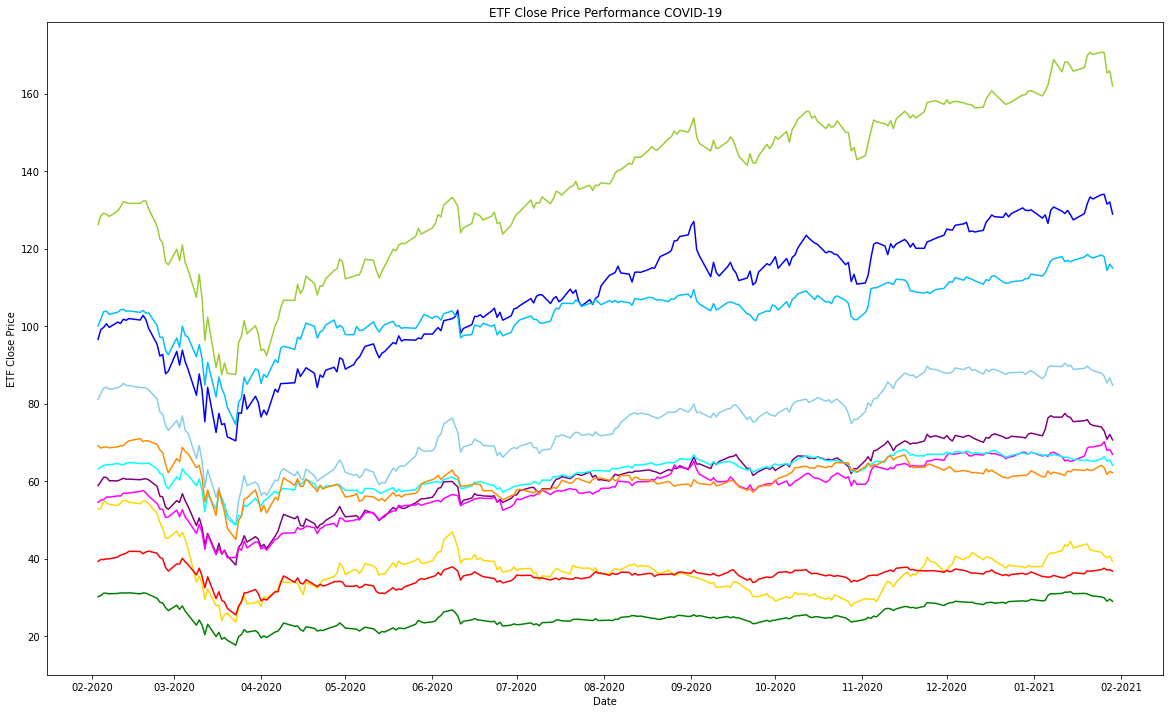

In [19]:
# Create a line plot with the ETFs Close Prices during the whole period 
fig,ax = plt.subplots(figsize=(20,12))
# plt.figure(figsize=(20,10))

ax.plot(copy_c['Date'], copy_c['XLB'], color='purple', label='Materials')
ax.plot(copy_c['Date'], copy_c['XLC'], color='magenta', label = 'Communication Services')
ax.plot(copy_c['Date'], copy_c['XLE'], color='gold', label='Energy')
ax.plot(copy_c['Date'], copy_c['XLF'], color='green', label='Financials')
ax.plot(copy_c['Date'], copy_c['XLI'], color='skyblue', label='Industrials')
ax.plot(copy_c['Date'], copy_c['XLK'], color='blue', label='Technology')
ax.plot(copy_c['Date'], copy_c['XLP'], color='aqua', label='Consumer Staples')
ax.plot(copy_c['Date'], copy_c['XLRE'], color='red', label='Real Estate')
ax.plot(copy_c['Date'], copy_c['XLU'], color='darkorange', label='Utilities')
ax.plot(copy_c['Date'], copy_c['XLV'], color='deepskyblue', label='Health Care')
ax.plot(copy_c['Date'], copy_c['XLY'], color='yellowgreen', label='Consumer Discretionary')

# Define the date format
date_form = DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#plt.legend()
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ETF Close Price",
       title="ETF Close Price Performance COVID-19")

plt.show()

In [20]:
# The index of our first Dataframe is date which we can use in our next step as our merging value
test = pd.DataFrame(index= [etf_data.index])
test

""
Date
2020-02-03
2020-02-04
2020-02-05
2020-02-06
2020-02-07
...
2021-01-25
2021-01-26
2021-01-27


In [21]:
# Earning Anlysis - Calculate the daily change between the close and open price 
daily_earnings = close.pct_change()
daily_earnings

,XLB,XLC,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY
Date,,,,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.017675,0.010449,0.003603,0.009612,0.018870,0.026193,0.006015,0.012987,-0.009971,0.017593,0.018224
2020-02-05,0.018537,0.001633,0.037597,0.020026,0.016705,0.005851,0.008024,-0.000754,0.004087,0.019253,0.005058
2020-02-06,-0.000492,0.012498,-0.010197,-0.001287,0.003215,0.009127,0.001717,0.004277,0.000291,0.000867,-0.002245
2020-02-07,-0.014272,-0.000716,-0.006990,-0.003545,-0.007240,-0.009144,0.001247,0.000501,-0.003197,-0.007800,-0.004345
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.005243,0.005811,-0.010221,-0.007251,-0.006779,0.008357,0.009989,0.008963,0.020051,0.006548,0.003704
2021-01-26,-0.013786,0.013576,-0.021374,-0.007968,-0.009214,0.000672,0.008977,0.010229,-0.009984,-0.003717,-0.000644
2021-01-27,-0.029464,-0.032345,-0.013497,-0.029451,-0.019862,-0.018876,-0.016890,-0.012790,-0.026946,-0.030360,-0.030829


In [22]:
for i, v in enumerate(daily_earnings):
    print(i,v)

0 XLB
1 XLC
2 XLE
3 XLF
4 XLI
5 XLK
6 XLP
7 XLRE
8 XLU
9 XLV
10 XLY


In [23]:
daily_earnings = daily_earnings[ETF]
daily_earnings

,XLE,XLU,XLK,XLB,XLP,XLY,XLI,XLC,XLV,XLF,XLRE
Date,,,,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.003603,-0.009971,0.026193,0.017675,0.006015,0.018224,0.018870,0.010449,0.017593,0.009612,0.012987
2020-02-05,0.037597,0.004087,0.005851,0.018537,0.008024,0.005058,0.016705,0.001633,0.019253,0.020026,-0.000754
2020-02-06,-0.010197,0.000291,0.009127,-0.000492,0.001717,-0.002245,0.003215,0.012498,0.000867,-0.001287,0.004277
2020-02-07,-0.006990,-0.003197,-0.009144,-0.014272,0.001247,-0.004345,-0.007240,-0.000716,-0.007800,-0.003545,0.000501
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.005811,0.006548,-0.007251,0.008963
2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,0.013576,-0.003717,-0.007968,0.010229
2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.032345,-0.030360,-0.029451,-0.012790


In [24]:
# Rename the columns with the corresponding ETF name
daily_earnings.columns = ['Energy', 'Utilities', 'Technology', 'Materials','Consumer Staples', 
                          'Consumer Discretionary', 'Industrials', 'Communication Serv', 'Health Care',
                         'Financials','Real Estate']
daily_earnings

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,0.003603,-0.009971,0.026193,0.017675,0.006015,0.018224,0.018870,0.010449,0.017593,0.009612,0.012987
2020-02-05,0.037597,0.004087,0.005851,0.018537,0.008024,0.005058,0.016705,0.001633,0.019253,0.020026,-0.000754
2020-02-06,-0.010197,0.000291,0.009127,-0.000492,0.001717,-0.002245,0.003215,0.012498,0.000867,-0.001287,0.004277
2020-02-07,-0.006990,-0.003197,-0.009144,-0.014272,0.001247,-0.004345,-0.007240,-0.000716,-0.007800,-0.003545,0.000501
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.005811,0.006548,-0.007251,0.008963
2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,0.013576,-0.003717,-0.007968,0.010229
2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.032345,-0.030360,-0.029451,-0.012790


In [25]:
# Remove Telcom Industry Column
daily_earnings= daily_earnings.drop(['Communication Serv'], axis=1)

In [26]:
# Use reset index method in order to convert Data Index into a column
daily_earnings = daily_earnings.reset_index()

In [27]:
# Verify the change was made
daily_earnings.columns

Index(['Date', 'Energy', 'Utilities', 'Technology', 'Materials',
       'Consumer Staples', 'Consumer Discretionary', 'Industrials',
       'Health Care', 'Financials', 'Real Estate'],
      dtype='object')

In [28]:
import seaborn as sns 

In [29]:
# Display the earnging dataframe
daily_earnings.corr() # Meter en seaborn/cluster map

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Energy,1.000000,0.581973,0.613482,0.819634,0.589180,0.724166,0.838036,0.651374,0.856196,0.687938
Utilities,0.581973,1.000000,0.712635,0.790895,0.866919,0.743903,0.793279,0.817641,0.764599,0.872076
Technology,0.613482,0.712635,1.000000,0.794026,0.816331,0.907344,0.783064,0.860159,0.759408,0.783301
Materials,0.819634,0.790895,0.794026,1.000000,0.798699,0.879807,0.940704,0.826743,0.914260,0.845416
Consumer Staples,0.589180,0.866919,0.816331,0.798699,1.000000,0.795391,0.805524,0.870758,0.772555,0.830500
Consumer Discretionary,0.724166,0.743903,0.907344,0.879807,0.795391,1.000000,0.885754,0.831850,0.851266,0.844971
Industrials,0.838036,0.793279,0.783064,0.940704,0.805524,0.885754,1.000000,0.826453,0.940924,0.868569
Health Care,0.651374,0.817641,0.860159,0.826743,0.870758,0.831850,0.826453,1.000000,0.795735,0.828758
Financials,0.856196,0.764599,0.759408,0.914260,0.772555,0.851266,0.940924,0.795735,1.000000,0.850886
Real Estate,0.687938,0.872076,0.783301,0.845416,0.830500,0.844971,0.868569,0.828758,0.850886,1.000000


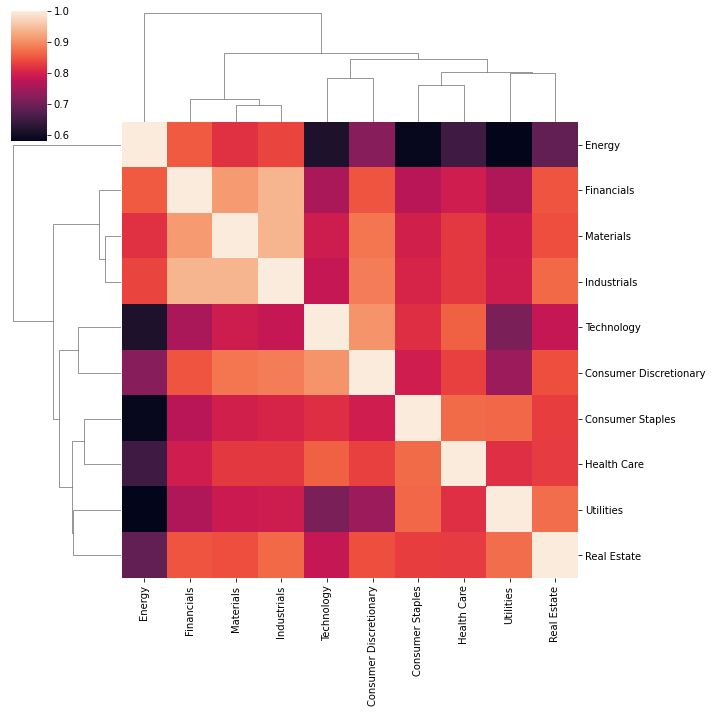

In [30]:
g = sns.clustermap(daily_earnings.corr())

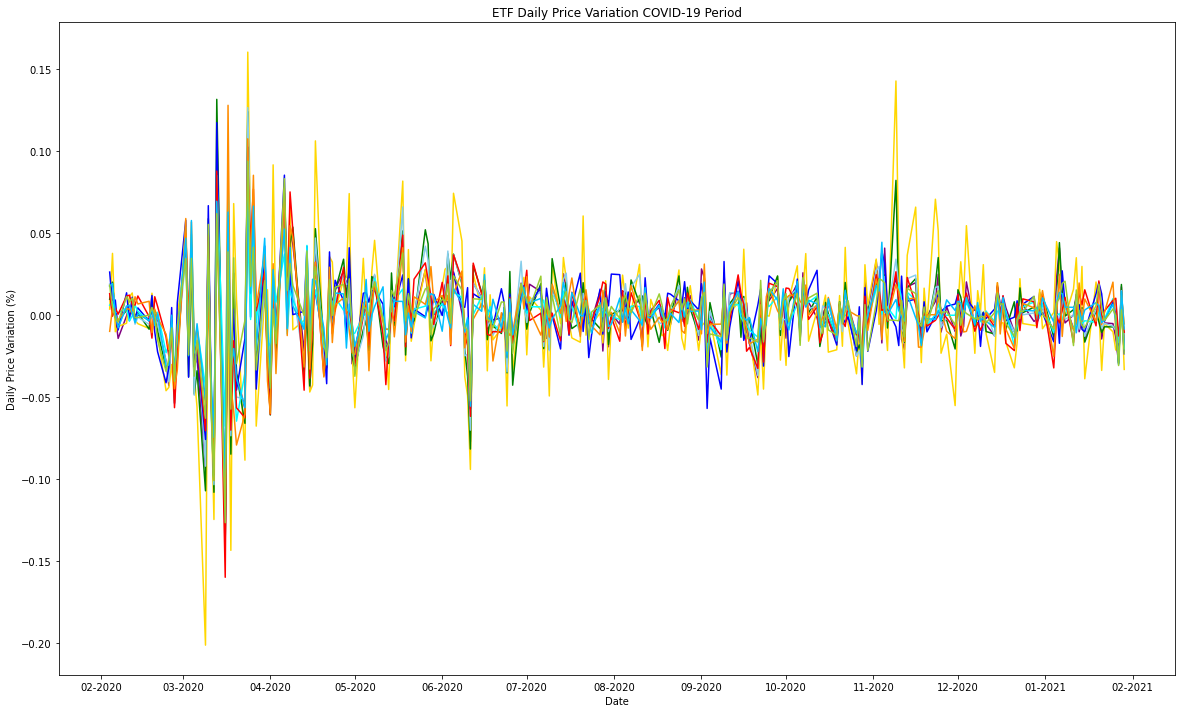

In [31]:
# Plot the daily changes/earnings by industry
fig,ax = plt.subplots(figsize=(20,12))

plt.plot(daily_earnings['Date'], daily_earnings['Materials'], color='purple', label='Materials')
plt.plot(daily_earnings['Date'], daily_earnings['Energy'], color='gold', label='Energy')
plt.plot(daily_earnings['Date'], daily_earnings['Financials'], color='green', label='Financials')
plt.plot(daily_earnings['Date'], daily_earnings['Industrials'], color='skyblue', label='Industrials')
plt.plot(daily_earnings['Date'], daily_earnings['Technology'], color='blue', label='Technology')
plt.plot(daily_earnings['Date'], daily_earnings['Consumer Staples'], color='aqua', label='Consumer Staples')
plt.plot(daily_earnings['Date'], daily_earnings['Real Estate'], color='red', label='Real Estate')
plt.plot(daily_earnings['Date'], daily_earnings['Utilities'], color='darkorange', label='Utilities')
plt.plot(daily_earnings['Date'], daily_earnings['Health Care'], color='deepskyblue', label='Health Care')
plt.plot(daily_earnings['Date'], daily_earnings['Consumer Discretionary'], color='yellowgreen', label='Consumer Discretionary')

# Define the date format
date_form = DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#plt.legend()
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Daily Price Variation (%)",
       title="ETF Daily Price Variation COVID-19 Period")


plt.show()

## Data Analysis Part II - Feb 2015 to Feb 2021

### Gather all the information related to Select Sector SPDR ETFs which are the Unique Exchange Traded Funds (ETFs) that divide the S&P into eleven index funds traded throughout the day on NYSE Arca

In [32]:
# Create a list with the ETFs names of the SPDR
ETF = 'XLE XLU XLK XLB XLP XLY XLI XLC XLV XLF XLRE'.split()
ETF

['XLE', 'XLU', 'XLK', 'XLB', 'XLP', 'XLY', 'XLI', 'XLC', 'XLV', 'XLF', 'XLRE']

In [33]:
# Use yahoo finance API function .download to return a dataframe with the information of the ETFs daily performance
full_df = yf.download(tickers= ETF, start='2015-01-31', end='2021-02-01') # define the period (COVID)

[*********************100%***********************]  11 of 11 completed


In [34]:
# Display the pre_covid dataframe
full_df.head()

Adj Close                                                  \
                  XLB XLC        XLE        XLF        XLI        XLK   
Date                                                                    
2015-02-02  42.597622 NaN  60.823181  16.861570  49.024681  36.779423   
2015-02-03  43.535961 NaN  62.487103  17.142832  49.821396  37.199127   
2015-02-04  43.252689 NaN  61.455940  17.099562  49.440746  37.272121   
2015-02-05  44.297268 NaN  62.338669  17.272652  49.865669  37.618835   
2015-02-06  44.191044 NaN  62.354282  17.409681  49.750580  37.500225   

                                                  ... Volume            \
                  XLP XLRE        XLU        XLV  ...    XLC       XLE   
Date                                              ...                    
2015-02-02  41.335491  NaN  39.613911  62.988140  ...    NaN  35465700   
2015-02-03  41.701294  NaN  39.760857  63.413132  ...    NaN  47027900   
2015-02-04  41.718315  NaN  39.279236  62.617397  ...    NaN  41132200   
2015-02-05  41.930984  NaN  39.638420  63.675339  ...    NaN  31786200   
2015-02-06  41.743835  NaN  38.005856  63.096642  ...    NaN  26134600   

                                                                             \
                 XLF       XLI       XLK       XLP XLRE       XLU       XLV   
Date                                                                          
2015-02-02  62984977  19465900  15623600  14354100  NaN  22399300  18042300   
2015-02-03  66155787  18896200   9883700   6279600  NaN  16159500  17432800   
2015-02-04  37523958  10600100   5889400   7901300  NaN  13859000  15184800   
2015-02-05  30264135   9193900   5091800   8079500  NaN  13165300  10801400   
2015-02-06  83237512   6192200   4790300   6304100  NaN  32184200  11886100   

                      
                 XLY  
Date                  
2015-02-02  20849400  
2015-02-03   5614400  
2015-02-04   9166000  
2015-02-05   5077500  
2015-02-06   4648300  

[5 rows x 66 columns]

In [35]:
# Select the pre_covid close price column
full_df_close = full_df['Close']
full_df_close = full_df_close[ETF]
full_df_close.columns = ['Energy', 'Utilities', 'Technology', 'Materials','Consumer Staples', 
                          'Consumer Discretionary', 'Industrials', 'Communication Serv', 'Health Care',
                         'Financials','Real Estate']
full_df_close

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,NaN,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,NaN,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,NaN,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,NaN,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,NaN,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,69.239998,118.360001,30.120001,37.150002
2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,70.180000,117.919998,29.879999,37.529999
2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,67.910004,114.339996,29.000000,37.049999


In [36]:
full_df_close.columns

Index(['Energy', 'Utilities', 'Technology', 'Materials', 'Consumer Staples',
       'Consumer Discretionary', 'Industrials', 'Communication Serv',
       'Health Care', 'Financials', 'Real Estate'],
      dtype='object')

In [37]:
# check for values that equal 0
zero_df2 = full_df_close[full_df_close[['Energy', 'Utilities', 'Technology', 'Materials', 'Consumer Staples',
       'Consumer Discretionary', 'Industrials', 'Communication Serv',
       'Health Care', 'Financials', 'Real Estate']] == 0].sum()
zero_df2

Energy                    0.0
Utilities                 0.0
Technology                0.0
Materials                 0.0
Consumer Staples          0.0
Consumer Discretionary    0.0
Industrials               0.0
Communication Serv        0.0
Health Care               0.0
Financials                0.0
Real Estate               0.0
dtype: float64

In [38]:
# Check for null values
full_df_close.isna().sum()

Energy                      0
Utilities                   0
Technology                  0
Materials                   0
Consumer Staples            0
Consumer Discretionary      0
Industrials                 0
Communication Serv        851
Health Care                 0
Financials                  0
Real Estate               173
dtype: int64

In [39]:
# Zoom in into those null values
full_df_close[full_df_close.isna().any(axis=1)]

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,NaN,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,NaN,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,NaN,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,NaN,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,NaN,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-12,76.709999,49.150002,72.110001,61.000000,51.349998,110.889999,76.510002,NaN,85.150002,27.950001,32.230000
2018-06-13,76.419998,49.020000,71.739998,60.340000,51.189999,111.059998,75.900002,NaN,85.169998,27.850000,31.510000
2018-06-14,76.309998,49.630001,72.250000,60.430000,51.279999,112.220001,75.610001,NaN,85.610001,27.590000,31.809999


In [40]:
# Inspect the XLC ETF null values
full_df_close[full_df_close['Communication Serv'].isna()]

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,NaN,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,NaN,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,NaN,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,NaN,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,NaN,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-12,76.709999,49.150002,72.110001,61.000000,51.349998,110.889999,76.510002,NaN,85.150002,27.950001,32.230000
2018-06-13,76.419998,49.020000,71.739998,60.340000,51.189999,111.059998,75.900002,NaN,85.169998,27.850000,31.510000
2018-06-14,76.309998,49.630001,72.250000,60.430000,51.279999,112.220001,75.610001,NaN,85.610001,27.590000,31.809999


In [41]:
# check those values of XLC that are not null
# creating bool series False for NaN values
bool_series = pd.notnull(full_df_close["Communication Serv"])
 
# displayed data only with team = NaN
full_df_close[bool_series]

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Communication Serv,Health Care,Financials,Real Estate
Date,,,,,,,,,,,
2018-06-19,74.739998,50.189999,71.430000,58.490002,51.060001,111.779999,73.230003,49.959999,84.860001,27.350000,31.500000
2018-06-20,75.070000,50.230000,71.580002,58.299999,51.110001,112.309998,73.279999,50.580002,85.040001,27.280001,31.840000
2018-06-21,73.680000,50.400002,71.029999,57.680000,51.209999,111.510002,72.360001,50.270000,84.550003,27.200001,32.029999
2018-06-22,75.150002,50.750000,70.800003,58.520000,51.630001,111.320000,72.610001,50.490002,84.930000,27.070000,32.310001
2018-06-25,73.639999,51.590000,69.330002,57.610001,51.889999,108.900002,71.690002,49.450001,84.150002,26.780001,32.230000
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,69.239998,118.360001,30.120001,37.150002
2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,70.180000,117.919998,29.879999,37.529999
2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,67.910004,114.339996,29.000000,37.049999


In [42]:
# Since there are too many null values in XLC and XLRE ETFs we are going to drop these columns
full_df_close = full_df_close.drop(['Communication Serv'], axis=1)

In [43]:
# Check the dataframe without XLC(Telecom) & XLRE(real estate)
full_daily_earnings = full_df_close.copy()
full_df_close

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Date,,,,,,,,,,
2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,69.660004,18.992689,NaN
2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,70.129997,19.309504,NaN
2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,69.250000,19.260763,NaN
2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,70.419998,19.455727,NaN
2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,118.360001,30.120001,37.150002
2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,117.919998,29.879999,37.529999
2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,114.339996,29.000000,37.049999


In [44]:
# Create a copy of the dataframe to format the date column and pass them as labels to our plot
full_df_close = full_df_close.reset_index()
full_df_close

,Date,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
0,2015-02-02,77.860001,48.529999,40.310001,48.119999,48.590000,70.620003,55.380001,69.660004,18.992689,NaN
1,2015-02-03,79.989998,48.709999,40.770000,49.180000,49.020000,72.120003,56.279999,70.129997,19.309504,NaN
2,2015-02-04,78.669998,48.119999,40.849998,48.860001,49.040001,72.599998,55.849998,69.250000,19.260763,NaN
3,2015-02-05,79.800003,48.560001,41.230000,50.040001,49.290001,73.050003,56.330002,70.419998,19.455727,NaN
4,2015-02-06,79.820000,46.560001,41.099998,49.919998,49.070000,72.940002,56.200001,69.779999,19.610073,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1505,2021-01-25,41.639999,64.099998,133.940002,73.989998,65.720001,170.729996,87.910004,118.360001,30.120001,37.150002
1506,2021-01-26,40.750000,63.459999,134.029999,72.970001,66.309998,170.619995,87.099998,117.919998,29.879999,37.529999
1507,2021-01-27,40.200001,61.750000,131.500000,70.820000,65.190002,165.360001,85.370003,114.339996,29.000000,37.049999
1508,2021-01-28,40.669998,62.490002,132.039993,72.040001,65.440002,165.880005,86.639999,116.010002,29.540001,37.150002


In [45]:
full_daily_earnings = full_daily_earnings.pct_change()
full_daily_earnings

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Date,,,,,,,,,,
2015-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-03,0.027357,0.003709,0.011412,0.022028,0.008850,0.021240,0.016251,0.006747,0.016681,NaN
2015-02-04,-0.016502,-0.012113,0.001962,-0.006507,0.000408,0.006656,-0.007640,-0.012548,-0.002524,NaN
2015-02-05,0.014364,0.009144,0.009302,0.024151,0.005098,0.006198,0.008595,0.016895,0.010122,NaN
2015-02-06,0.000251,-0.041186,-0.003153,-0.002398,-0.004463,-0.001506,-0.002308,-0.009088,0.007933,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.006548,-0.007251,0.008963
2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,-0.003717,-0.007968,0.010229
2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.030360,-0.029451,-0.012790


In [46]:
full_daily_earnings = full_daily_earnings.reset_index()
full_daily_earnings

,Date,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
0,2015-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-02-03,0.027357,0.003709,0.011412,0.022028,0.008850,0.021240,0.016251,0.006747,0.016681,NaN
2,2015-02-04,-0.016502,-0.012113,0.001962,-0.006507,0.000408,0.006656,-0.007640,-0.012548,-0.002524,NaN
3,2015-02-05,0.014364,0.009144,0.009302,0.024151,0.005098,0.006198,0.008595,0.016895,0.010122,NaN
4,2015-02-06,0.000251,-0.041186,-0.003153,-0.002398,-0.004463,-0.001506,-0.002308,-0.009088,0.007933,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1505,2021-01-25,-0.010221,0.020051,0.008357,-0.005243,0.009989,0.003704,-0.006779,0.006548,-0.007251,0.008963
1506,2021-01-26,-0.021374,-0.009984,0.000672,-0.013786,0.008977,-0.000644,-0.009214,-0.003717,-0.007968,0.010229
1507,2021-01-27,-0.013497,-0.026946,-0.018876,-0.029464,-0.016890,-0.030829,-0.019862,-0.030360,-0.029451,-0.012790
1508,2021-01-28,0.011691,0.011984,0.004106,0.017227,0.003835,0.003145,0.014876,0.014606,0.018621,0.002699


In [47]:
full_daily_earnings.corr() # Meter en seaborn/cluster map

,Energy,Utilities,Technology,Materials,Consumer Staples,Consumer Discretionary,Industrials,Health Care,Financials,Real Estate
Energy,1.000000,0.424814,0.584052,0.761067,0.505806,0.655492,0.766269,0.573224,0.760513,0.537601
Utilities,0.424814,1.000000,0.509563,0.541868,0.742009,0.524567,0.569958,0.567881,0.511886,0.777074
Technology,0.584052,0.509563,1.000000,0.753015,0.699862,0.878583,0.781340,0.786251,0.732173,0.627606
Materials,0.761067,0.541868,0.753015,1.000000,0.676611,0.804964,0.893429,0.726027,0.833501,0.655835
Consumer Staples,0.505806,0.742009,0.699862,0.676611,1.000000,0.710599,0.709945,0.727727,0.657684,0.736430
Consumer Discretionary,0.655492,0.524567,0.878583,0.804964,0.710599,1.000000,0.846627,0.768478,0.801427,0.684279
Industrials,0.766269,0.569958,0.781340,0.893429,0.709945,0.846627,1.000000,0.757394,0.888791,0.689298
Health Care,0.573224,0.567881,0.786251,0.726027,0.727727,0.768478,0.757394,1.000000,0.725386,0.648103
Financials,0.760513,0.511886,0.732173,0.833501,0.657684,0.801427,0.888791,0.725386,1.000000,0.651314
Real Estate,0.537601,0.777074,0.627606,0.655835,0.736430,0.684279,0.689298,0.648103,0.651314,1.000000


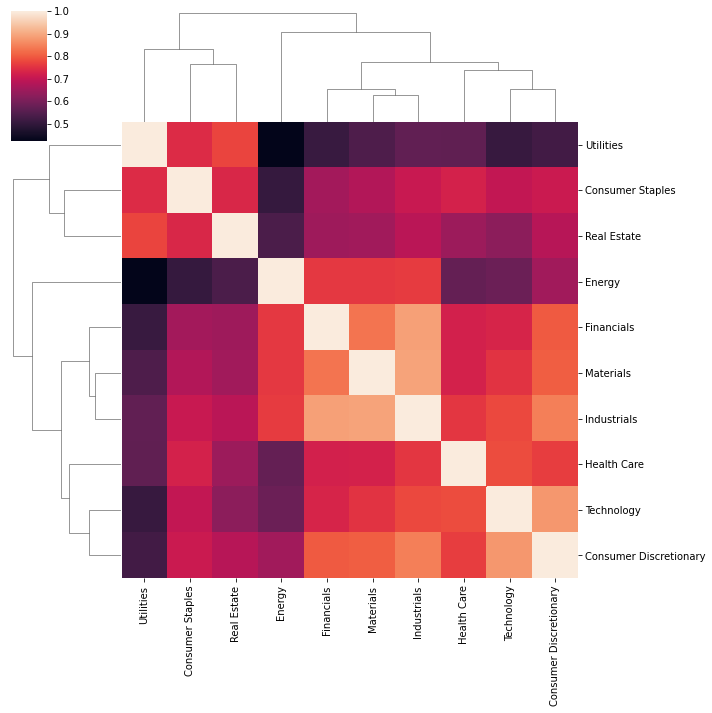

In [48]:
g = sns.clustermap(full_daily_earnings.corr())

In [49]:
# create a new column called month_year with data format: Year-Month by using the 'Date' column 
full_df_close['Year_Month'] = full_df_close['Date'].apply(lambda x: x.strftime('%Y-%m'))
months2 = full_df_close['Year_Month'].unique()
months_labels2 = months2.tolist() #take the unique year-month values an save it as a list

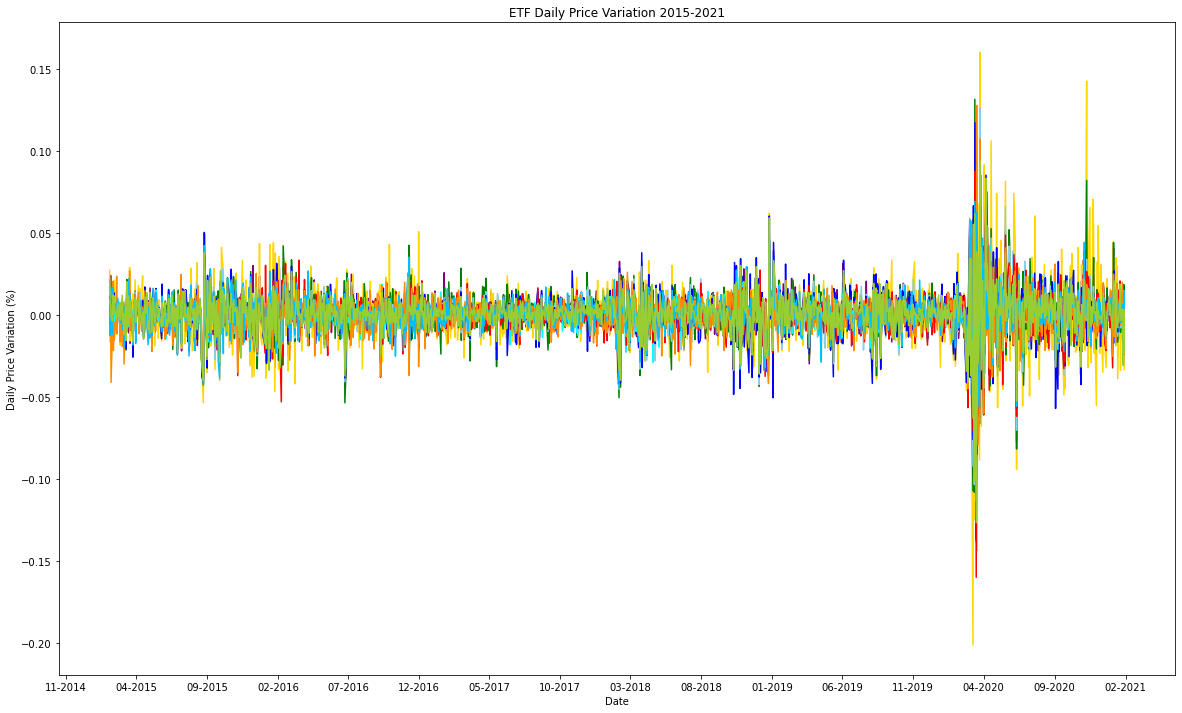

In [50]:
# Plot the daily changes/earnings by industry
fig,ax = plt.subplots(figsize=(20,12))

plt.plot(full_daily_earnings['Date'], full_daily_earnings['Materials'], color='purple', label='Materials')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Energy'], color='gold', label='Energy')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Financials'], color='green', label='Financials')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Industrials'], color='skyblue', label='Industrials')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Technology'], color='blue', label='Technology')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Consumer Staples'], color='aqua', label='Consumer Staples')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Real Estate'], color='red', label='Real Estate')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Utilities'], color='darkorange', label='Utilities')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Health Care'], color='deepskyblue', label='Health Care')
plt.plot(full_daily_earnings['Date'], full_daily_earnings['Consumer Discretionary'], color='yellowgreen', label='Consumer Discretionary')

# Define the date format
date_form = DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))

#plt.legend()
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Daily Price Variation (%)",
       title="ETF Daily Price Variation 2015-2021")

plt.show()

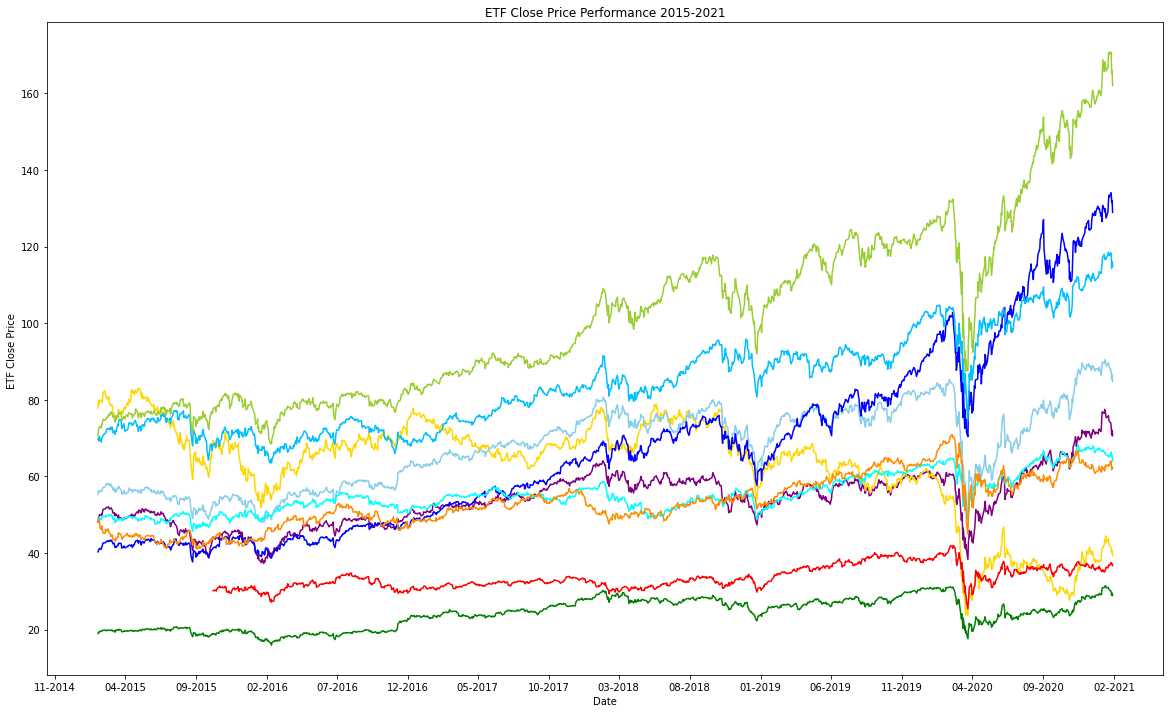

In [54]:
# Create a line plot with the ETFs Close Prices during the whole period 
fig,ax = plt.subplots(figsize=(20,12))

plt.plot(full_df_close['Date'], full_df_close['Materials'], color='purple', label='Materials')
plt.plot(full_df_close['Date'], full_df_close['Energy'], color='gold', label='Energy')
plt.plot(full_df_close['Date'], full_df_close['Financials'], color='green', label='Financials')
plt.plot(full_df_close['Date'], full_df_close['Industrials'], color='skyblue', label='Industrials')
plt.plot(full_df_close['Date'], full_df_close['Technology'], color='blue', label='Technology')
plt.plot(full_df_close['Date'], full_df_close['Consumer Staples'], color='aqua', label='Consumer Staples')
plt.plot(full_df_close['Date'], full_df_close['Utilities'], color='darkorange', label='Utilities')
plt.plot(full_df_close['Date'], full_df_close['Health Care'], color='deepskyblue', label='Health Care')
plt.plot(full_df_close['Date'], full_df_close['Consumer Discretionary'], color='yellowgreen', label='Consumer Discretionary')
plt.plot(full_df_close['Date'], full_df_close['Real Estate'], color='red', label='Real Estate')

# Define the date format
date_form = DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=5))

#plt.legend()
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ETF Close Price ",
       title="ETF Close Price Performance 2015-2021")
plt.show()

plt.show()

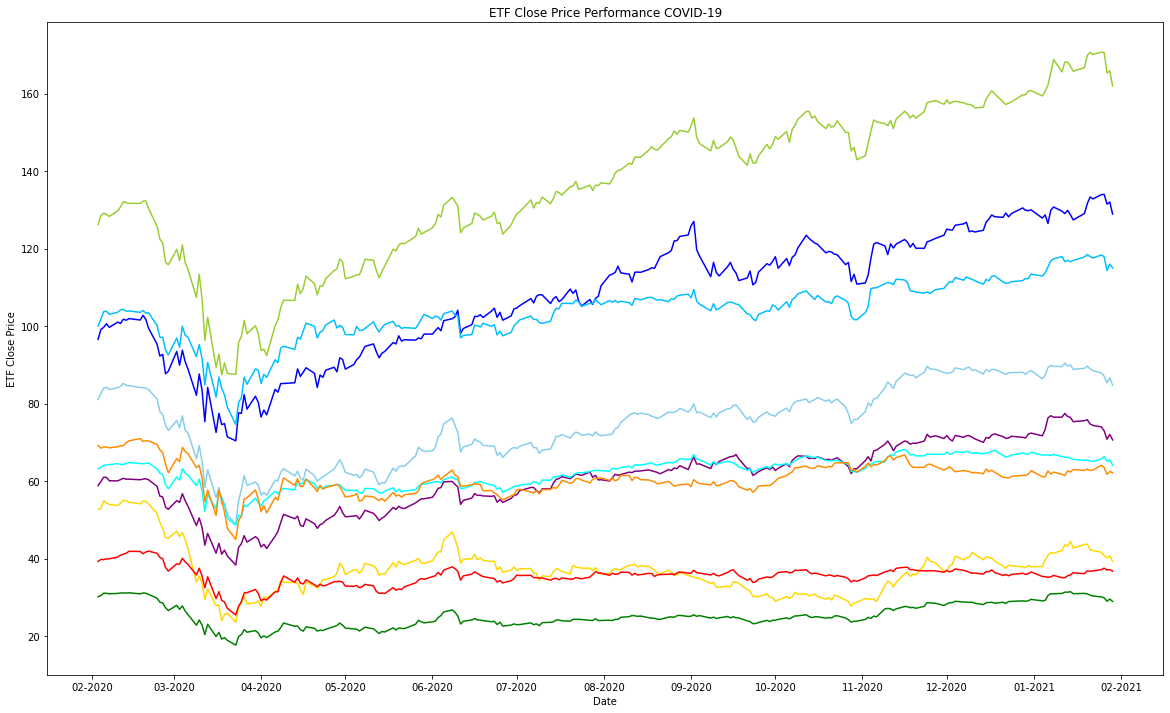

In [55]:
# Create a line plot with the ETFs Close Prices during the whole period 
fig,ax = plt.subplots(figsize=(20,12))

plt.plot(copy_c['Date'], copy_c['XLB'], color='purple', label='Materials')
plt.plot(copy_c['Date'], copy_c['XLE'], color='gold', label='Energy')
plt.plot(copy_c['Date'], copy_c['XLF'], color='green', label='Financials')
plt.plot(copy_c['Date'], copy_c['XLI'], color='skyblue', label='Industrials')
plt.plot(copy_c['Date'], copy_c['XLK'], color='blue', label='Technology')
plt.plot(copy_c['Date'], copy_c['XLP'], color='aqua', label='Consumer Staples')
plt.plot(copy_c['Date'], copy_c['XLU'], color='darkorange', label='Utilities')
plt.plot(copy_c['Date'], copy_c['XLV'], color='deepskyblue', label='Health Care')
plt.plot(copy_c['Date'], copy_c['XLY'], color='yellowgreen', label='Consumer Discretionary')
plt.plot(copy_c['Date'], copy_c['XLRE'], color='red', label='Real Estate')


# Define the date format
date_form = DateFormatter('%m-%Y')
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#plt.legend()
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="ETF Close Price",
       title="ETF Close Price Performance COVID-19")

plt.show()